### Project after first class

In [1]:
from duckduckgo_search import DDGS
from fastcore.all import *

In [2]:
ddgs = DDGS()

def search_images(term, max_images=200):
    print(f"Searching for '{term}'")
    return L(ddgs.images(keywords=term, max_results=max_images)).itemgot('image')

In [7]:
urls = search_images(term='fork')
urls[0]

Searching for 'fork'


'https://images-na.ssl-images-amazon.com/images/I/71RRthv0TkL._AC_SL1500_.jpg'

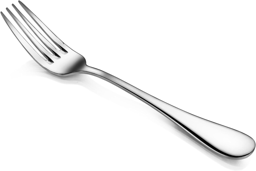

In [8]:
from fastdownload import download_url
dest = 'fork.jpg'
download_url(urls[0], dest, show_progress=False)
from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'spoon photos'


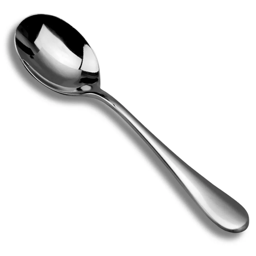

In [9]:
download_url(search_images('spoon photos', max_images=1)[0], 'spoon.jpg', show_progress=False)
Image.open('spoon.jpg').to_thumb(256,256)

In [13]:
searches = 'fork','spoon'
path = Path('fork_or_not')
from time import sleep
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10) # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} wood photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} metal photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'fork photo'
Searching for 'fork wood photo'
Searching for 'fork metal photo'


/Users/medhaniesolomon/miniconda3/envs/tf/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/Users/medhaniesolomon/miniconda3/envs/tf/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Searching for 'spoon photo'
Searching for 'spoon wood photo'
Searching for 'spoon metal photo'


ValueError: unknown file extension: .heic

In [14]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

65

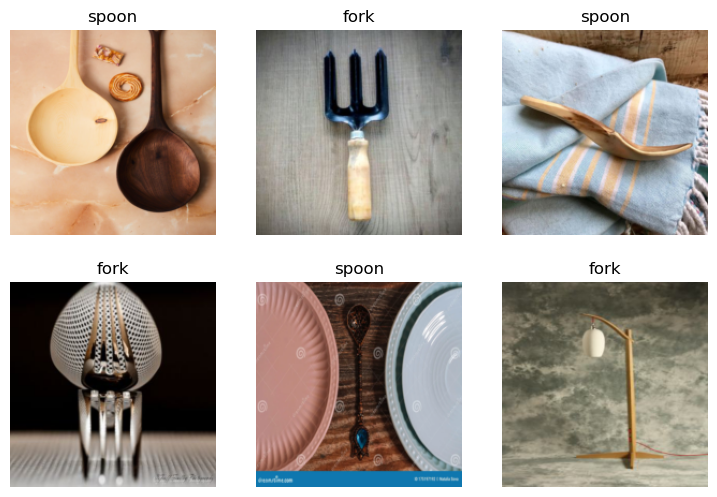

In [15]:
dls = DataBlock( blocks=(ImageBlock, CategoryBlock), get_items=get_image_files, splitter=RandomSplitter(valid_pct=0.2, seed=42), get_y=parent_label, item_tfms=[Resize(192, method='squish')] ).dataloaders(path)
dls.show_batch(max_n=6)

In [16]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.793822,0.508695,0.162037,01:39


/Users/medhaniesolomon/miniconda3/envs/tf/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.397251,0.393323,0.108796,01:57
1,0.235942,0.351549,0.108796,01:43
2,0.159016,0.334659,0.101852,01:47


In [18]:
is_fork,_,probs = learn.predict('spoon.jpg')
print(f"This is a: {is_fork}.")
print(f"This is a: {_}.")
print(f"Probability it's a fork: {probs[0]:.4f}")

This is a: spoon.
This is a: 1.
Probability it's a fork: 0.0000
